# Homework 6
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernels. Tune kernel parameters using Randomsearch method.

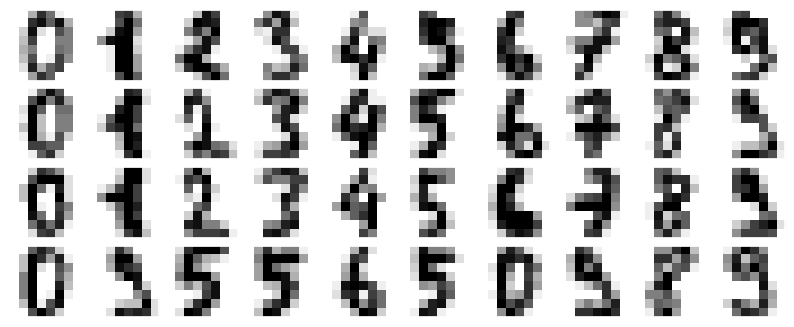

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

array([ 1,  3,  6, 10, 15, 21])

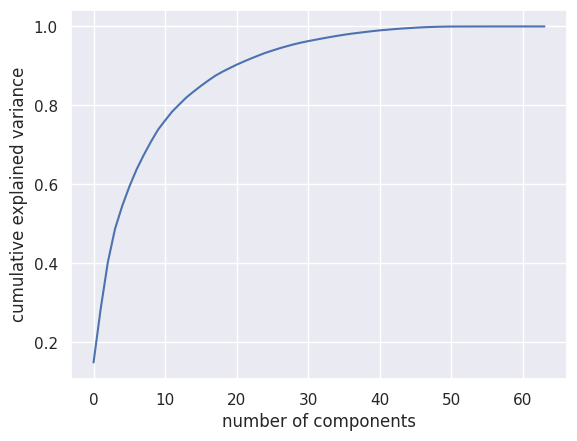

In [20]:
from sklearn.decomposition import PCA

# Borrowed code from in-class example. PCA.ipynb under the "Choosing number of components" header, to be exact.
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a)

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Reducing data to 80%
pca = PCA(n_components=0.8)

# Create training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=42)

# Linear Test
svc_linear = SVC(kernel='linear')
model_linear = make_pipeline(pca, svc_linear)

linear = RandomizedSearchCV(estimator=model_linear, param_distributions={'svc__C':[1, 10, 100, 1000]}, n_iter=4, n_jobs=4, cv=5)
linear.fit(Xtrain, ytrain)

accuracy_linear = linear.score(Xtest, ytest)
print('Linear parameters: ' + repr(linear.best_params_)
      + '\nLinear accuracy: ' + repr(accuracy_linear))

# Polynomial Test
svc_polynomial = SVC(kernel='poly')
model_polynomial = make_pipeline(pca, svc_polynomial)

polynomial = RandomizedSearchCV(estimator = model_polynomial, param_distributions={'svc__C':[1, 10, 100, 1000], 'svc__degree':[1,2,3,4]}, n_jobs=5, cv=5)
polynomial.fit(Xtrain, ytrain)

accuracy_poly = polynomial.score(Xtest, ytest)
print('Polynomial parameters: ' + repr(polynomial.best_params_)
      + '\nPolynomial accuracy: ' + repr(accuracy_poly))

# Radial Test
svc_radial = SVC(kernel='rbf')
model_radial = make_pipeline(pca, svc_radial)

radial = RandomizedSearchCV(estimator=model_radial, param_distributions={'svc__C':[1, 10, 100, 1000], 'svc__gamma':[0.1, 0.01, 0.001, 0.0001]}, n_jobs=5, cv=5)
radial.fit(Xtrain, ytrain)

accuracy_radial = radial.score(Xtest, ytest)
print('Radial parameters: ' + repr(radial.best_params_)
      + '\nRadial accuracy: ' + repr(accuracy_radial))

Linear parameters: {'svc__C': 1000}
Linear accuracy: 0.9577777777777777
Polynomial parameters: {'svc__degree': 3, 'svc__C': 100}
Polynomial accuracy: 0.9755555555555555
Radial parameters: {'svc__gamma': 0.001, 'svc__C': 1}
Radial accuracy: 0.9888888888888889
